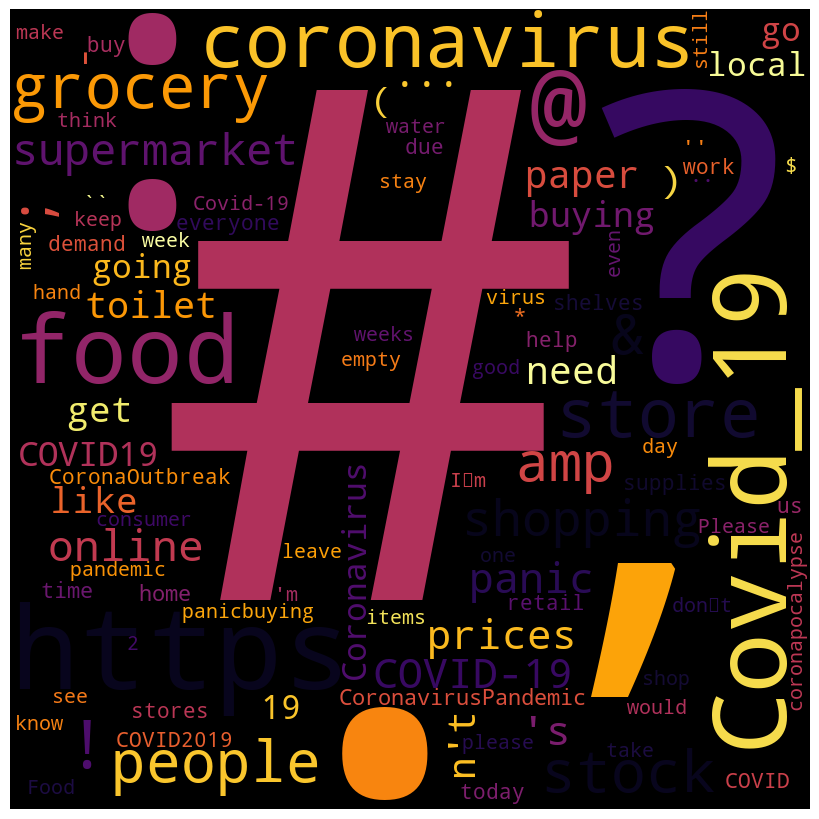

In [20]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# read in the data file
data = pd.read_csv("Corona_NLP_test.csv")

# extract the text corpus from the "OriginalTweet" column
corpus = data["OriginalTweet"].tolist()

# define the stop words to remove
stop_words = set(stopwords.words('english'))

#1 tokenize each tweet in the corpus and remove stop words
tokenized_corpus = []
for tweet in corpus:
    # tokenize the tweet into words
    tokens = word_tokenize(tweet)
    #2 remove stop words from the token list
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # add the filtered tokens to the tokenized corpus
    tokenized_corpus.append(filtered_tokens)

#3 count word frequencies
word_freqs = Counter()
for tokens in tokenized_corpus:
    word_freqs.update(tokens)

#4 create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=100, relative_scaling=0.5, colormap='inferno').generate_from_frequencies(word_freqs)

# display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
